In [ ]:
############   Importing Libraries  ############

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df = df.sample(frac=1)
print(df.head())

     Daily Time Spent on Site  Age  ...                 Country  Clicked on Ad
579                     68.11   38  ...              Seychelles              0
249                     62.20   25  ...           Liechtenstein              1
781                     75.55   36  ...  Bosnia and Herzegovina              1
999                     45.01   26  ...                  Brazil              1
126                     80.31   44  ...                 Hungary              1

[5 rows x 9 columns]


EDA

In [ ]:
### Number of Unique Values ###
for col in df:
  print(f'number of unique values of {col}:', df[col].nunique())

### Number of null values ###
df.isnull().sum()

number of unique values of Daily Time Spent on Site: 900
number of unique values of Age: 43
number of unique values of Area Income: 1000
number of unique values of Daily Internet Usage: 966
number of unique values of Ad Topic Line: 1000
number of unique values of City: 969
number of unique values of Male: 2
number of unique values of Country: 237
number of unique values of Clicked on Ad: 2


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Clicked on Ad               0
dtype: int64

Number of class values

1    500
0    500
Name: Clicked on Ad, dtype: int64


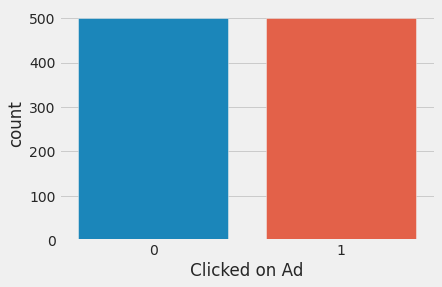

In [ ]:
print(df['Clicked on Ad'].value_counts())
sns.countplot(x='Clicked on Ad', data=df)

In [ ]:
df_final = df.drop(['Ad Topic Line', 'Country', 'City'], axis=1)
df_final.head()
df_final.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x = df_final[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df_final['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=48)

print('Input Shape', (x_train.shape))
print('Output Shape', x_test.shape)
from sklearn.linear_model import LogisticRegression as lr
import warnings
temp1 = lr(random_state=0).fit(x_train, y_train)
temp = temp1.predict(x_train)
print(classification_report(y_train, temp))


Input Shape (700, 5)
Output Shape (300, 5)
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       360
           1       0.97      0.94      0.95       340

    accuracy                           0.96       700
   macro avg       0.96      0.96      0.96       700
weighted avg       0.96      0.96      0.96       700



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')


def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.values.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)
print(x_train.head())
# Training 
w, b, l = train(x_train, y_train, bs=1, epochs=100, lr=0.05)
# Plotting Decision Boundary
#plot_decision_boundary(x_train, w, b)

y_hat = predict(x_train)
print(classification_report(y_train, y_hat))
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
accuracy(y_train, y_hat=predict(x_train))

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
842                     78.24   23     54106.21                199.29     0
437                     76.24   27     63976.44                214.42     0
111                     63.24   53     65229.13                235.78     1
976                     61.84   45     46024.29                105.63     1
302                     39.25   39     62378.05                152.36     0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       360
           1       0.49      1.00      0.65       340

    accuracy                           0.49       700
   macro avg       0.24      0.50      0.33       700
weighted avg       0.24      0.49      0.32       700



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4857142857142857